# Robredo - Marcos Results Transmission (as of 11:32PM, May 9)

This is an analysis of trends relating to the transmission of results for 2022 Presidential Elections, particularly the difference in votes of Robredo and Marcos. Claims have been made that the transmission of results indicates some form of election manipulation as the data and ratios are consistent, and this serves to look into purported indicators of manipulation. 

This was cloned from https://github.com/albertyumol/ph-election-2022-draft.git with the followinmg adjustments made:
1. The errors with the datetime formatting of the graphs were addressed using a different method of formatting.
2. The original non-cumulative features were engineered and graphed for reference.

The original analysis can be found here: https://www.facebook.com/bash.yumol.3/posts/734193114377526

TODO:
1. Scrape data from https://2022electionresults.comelec.gov.ph/ and apply Benford's Law

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime

df = pd.read_csv('test.csv')

df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M PM' ).dt.time
df["Marcos"] = df["Marcos"].str.replace(',', '').astype(float)
df["Robredo"] = df["Robredo"].str.replace(',', '').astype(float)


This analysis looks into the cumulative results (ie the total votes the two candidates garnered), which most have pointed to as evidence of election manipulation, and the incremental gains of each candidate for each of the times specified.

In [26]:
df["Total"] = df["Robredo"] + df["Marcos"]
df["Marcos Share"] = df["Marcos"] / df["Total"]
df["Robredo Share"] = df["Robredo"] / df["Total"]

In [27]:
df["Marcos - Not Cumulative"] = df["Marcos"] - df["Marcos"].shift(-1)
df["Robredo - Not Cumulative"] = df["Robredo"] - df["Robredo"].shift(-1)

In [28]:
df["Total - Not Cumulative"] = df["Marcos - Not Cumulative"] + df["Robredo - Not Cumulative"]
df["Marcos Share - Not Cumulative"] = df["Marcos - Not Cumulative"] / df["Total - Not Cumulative"]
df["Robredo Share - Not Cumulative"] = df["Robredo - Not Cumulative"] / df["Total - Not Cumulative"]

The following graph is based on the cumulative results transmitted and it indicates the suspicion that the results were engineered. The share of votes is consistent all throughout. However, as these are cumulative results, these may carry patterns from previous rows leading to the consistency observed.

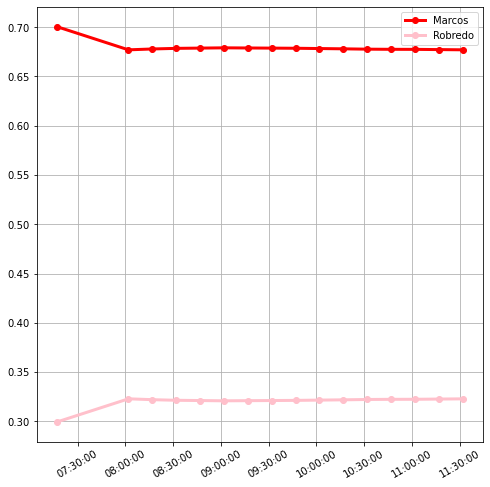

In [29]:
from matplotlib.dates import DateFormatter

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
df["Time"] = pd.to_datetime(df['Time'].astype(str))

ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

# Plot line
ax.plot(df['Time'], df["Marcos Share"], color="red", label="Marcos", linewidth=3, marker='o')
ax.plot(df['Time'], df["Robredo Share"], color="pink", label="Robredo", linewidth=3, marker='o')

plt.xticks(rotation=30)
ax.grid()
ax.legend();

The following graph shows the non-cumulative results transmitted meaning that these are the votes gained by each candidate at the time indicated as opposed to the previous that only showed their running totals. More variation could be observed here indicating that the previous observation is not enough proof of election manipulation.

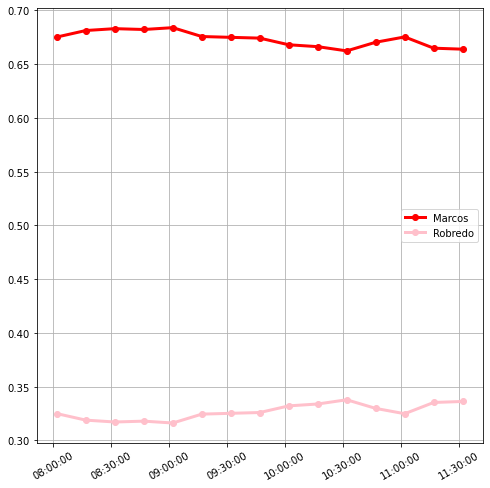

In [30]:
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))
df["Time"] = pd.to_datetime(df['Time'].astype(str))

# The following line caused errors, originally it was "atetime" sa start
#datetime(df['Time'].astype(str), format= '%H:%M:%S').dt.time
# Assuming this only formats the x-axis, we can do a different way of doing this as follows
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

# Plot line
ax.plot(df['Time'], df["Marcos Share - Not Cumulative"], color="red", label="Marcos", linewidth=3, marker='o')
ax.plot(df['Time'], df["Robredo Share - Not Cumulative"], color="pink", label="Robredo", linewidth=3, marker='o')

plt.xticks(rotation=30)
ax.grid()
ax.legend();

Lastly, the following table shows the numerical results which the two graphs were based on. Note that the cumulative and non-cumulative shares of votes were the ones graphed.

In [31]:
df

,Time,Marcos,Robredo,Total,Marcos Share,Robredo Share,Marcos - Not Cumulative,Robredo - Not Cumulative,Total - Not Cumulative,Marcos Share - Not Cumulative,Robredo Share - Not Cumulative
0,2022-05-10 11:32:00,25914360.0,12361112.0,38275472.0,0.677049,0.322951,424940.0,215252.0,640192.0,0.663770,0.336230
1,2022-05-10 11:17:00,25489420.0,12145860.0,37635280.0,0.677275,0.322725,437565.0,220729.0,658294.0,0.664695,0.335305
2,2022-05-10 11:02:00,25051855.0,11925131.0,36976986.0,0.677499,0.322501,486344.0,233993.0,720337.0,0.675162,0.324838
3,2022-05-10 10:47:00,24565511.0,11691138.0,36256649.0,0.677545,0.322455,494660.0,243387.0,738047.0,0.670228,0.329772
4,2022-05-10 10:32:00,24070851.0,11447751.0,35518602.0,0.677697,0.322303,518748.0,264633.0,783381.0,0.662191,0.337809
5,2022-05-10 10:17:00,23552103.0,11183118.0,34735221.0,0.678047,0.321953,534818.0,268073.0,802891.0,0.666115,0.333885
6,2022-05-10 10:02:00,23017285.0,10915045.0,33932330.0,0.678329,0.321671,607086.0,301901.0,908987.0,0.667871,0.332129
7,2022-05-10 09:47:00,22410199.0,10613144.0,33023343.0,0.678617,0.321383,684217.0,330864.0,1015081.0,0.674052,0.325948
8,2022-05-10 09:32:00,21725982.0,10282280.0,32008262.0,0.678762,0.321238,747899.0,360460.0,1108359.0,0.674780,0.325220
9,2022-05-10 09:17:00,20978083.0,9921820.0,30899903.0,0.678904,0.321096,893432.0,429118.0,1322550.0,0.675537,0.324463


Therefore, further proof is needed to support claims of election manipulation. Applying Benford's Law (another indicator of possible election manipulation) using the precinct data from COMELEC also indicates that no signs of election manipulation could be seen.